In [1]:
import os

In [2]:
import pandas as pd

In [3]:
os.chdir('D:\\mar\\Vyakya - Online Interview Task')

In [4]:
data= pd.read_json('train.json')

In [5]:
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:

#testdf = testdf.sort('id' , ascending=True)

In [7]:
data1= pd.read_json('test.json')

In [8]:
data1.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [9]:
data1.shape

(9944, 2)

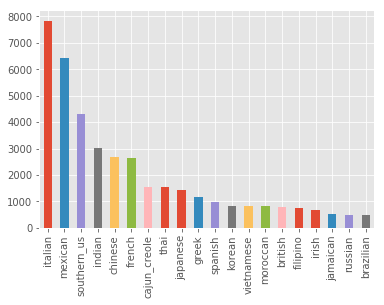

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data['cuisine'].value_counts().plot(kind='bar')

In [11]:
from collections import Counter
counters = {}
for cuisine in data['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (data['cuisine'] == cuisine)
    for ingredients in data[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [12]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [13]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [14]:
data['every_ingredients'] = data['ingredients'].map(";".join)
data.head()

,cuisine,id,ingredients,every_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [15]:
data['every_ingredients'].str.contains('pepper')

0         True
1         True
2         True
3        False
4         True
5        False
6         True
7        False
8         True
9        False
10        True
11        True
12        True
13        True
14        True
15        True
16       False
17       False
18       False
19        True
20       False
21       False
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29       False
         ...  
39744     True
39745    False
39746     True
39747    False
39748    False
39749    False
39750     True
39751     True
39752    False
39753     True
39754     True
39755    False
39756    False
39757     True
39758     True
39759     True
39760    False
39761     True
39762     True
39763    False
39764     True
39765    False
39766     True
39767     True
39768     True
39769    False
39770     True
39771    False
39772    False
39773     True
Name: every_ingredients, Length: 39774, dtype: bool

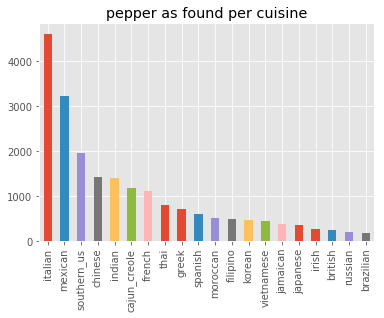

In [16]:
indices = data['every_ingredients'].str.contains('pepper')
data[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='pepper as found per cuisine')

In [17]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

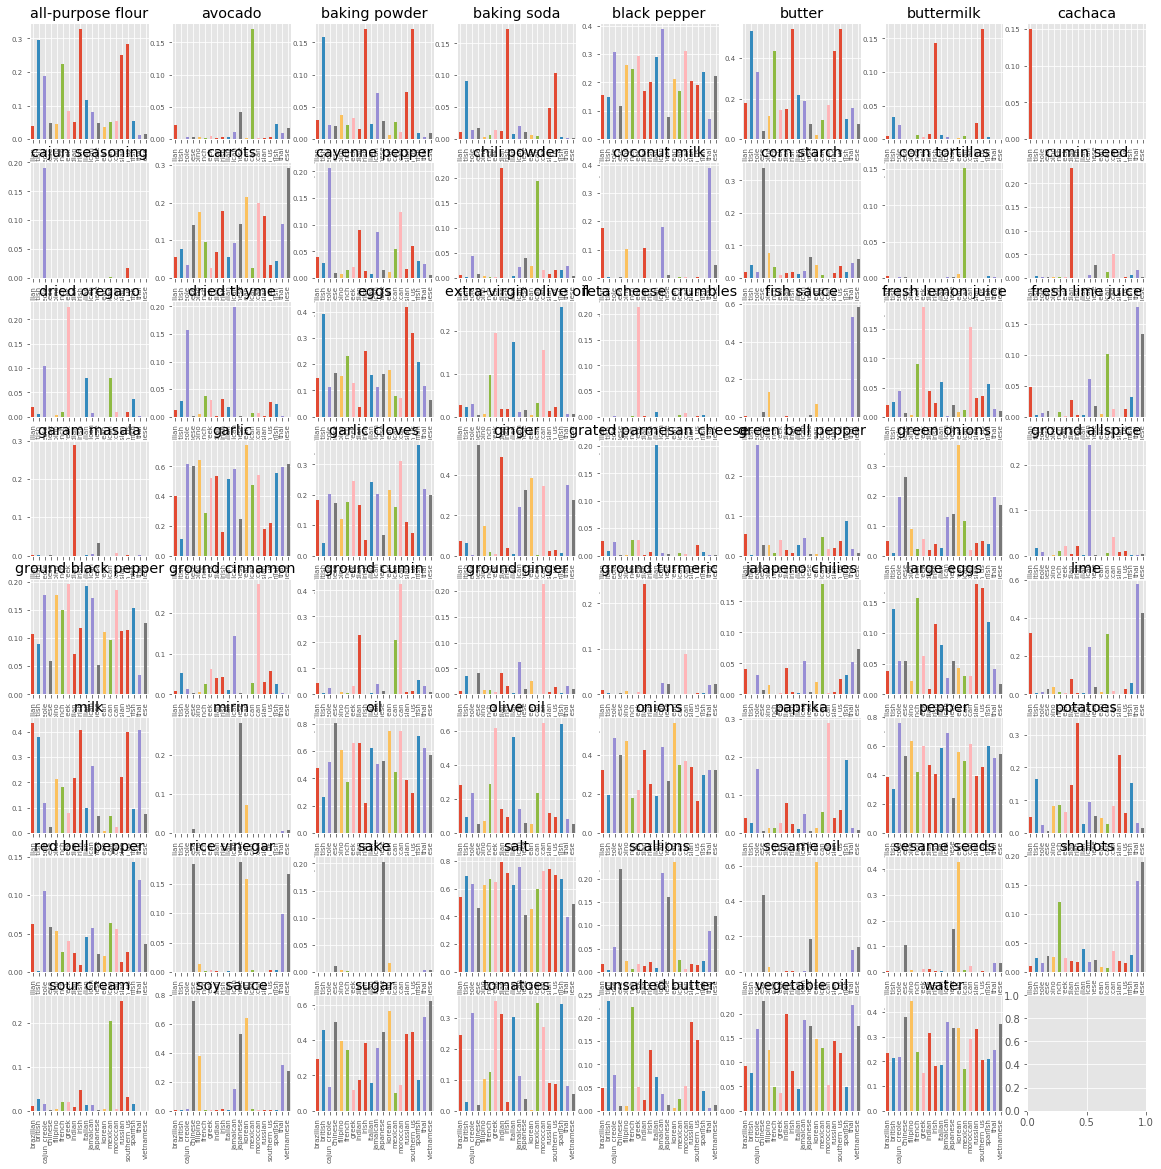

In [18]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = data['every_ingredients'].str.contains(ingredient)
    relative_freq = (data[indices]['cuisine'].value_counts() / data['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(data['every_ingredients'].values)
X.shape

(39774, 3051)

In [21]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(data.cuisine)
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [23]:
#We can check the result by inspecting the encoders classes
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

C:\Users\Poorna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Poorna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
logistic.score(X_test, y_test)

0.784286612193589

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
tree.score(X_test, y_test)

0.6465116279069767

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier()
neighbor.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
neighbor.score(X_test, y_test)

0.6406033940917661

Text(0.5, 64.59999999999997, 'Predicted label')

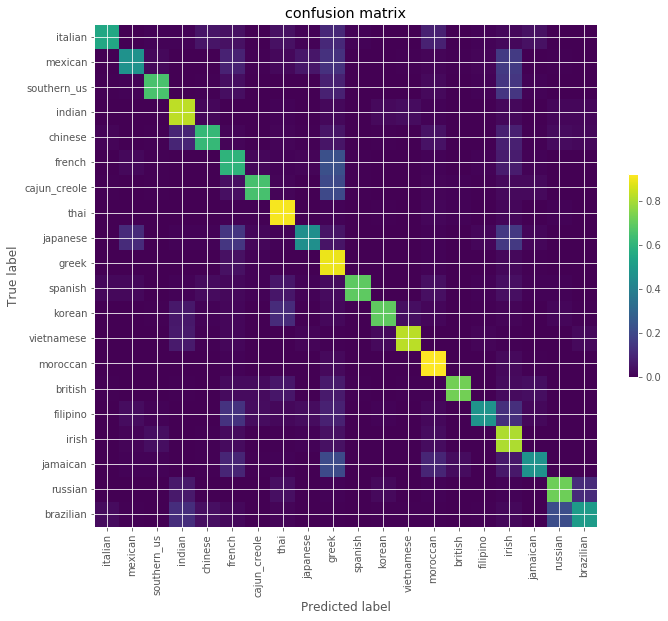

In [30]:
#Inspecting the classification results using a confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.76      0.55      0.64        94
     mexican       0.58      0.47      0.52       146
 southern_us       0.82      0.66      0.73       334
      indian       0.83      0.83      0.83       535
     chinese       0.71      0.62      0.66       158
      french       0.60      0.60      0.60       528
cajun_creole       0.78      0.66      0.71       238
        thai       0.85      0.91      0.88       593
    japanese       0.61      0.46      0.53       124
       greek       0.79      0.90      0.84      1602
     spanish       0.84      0.70      0.76       105
      korean       0.85      0.70      0.77       267
  vietnamese       0.81      0.83      0.82       169
    moroccan       0.91      0.93      0.92      1270
     british       0.87      0.73      0.79       177
    filipino       0.62      0.47      0.54        95
       irish       0.72      0.81      0.76       873
    jamaican       0.66    

In [32]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn import grid_search
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# A combination of Word lemmatization + LinearSVC model finally pushes the accuracy score past 80%

traindf = pd.read_json("D:\\mar\\Vyakya - Online Interview Task\\train.json")
traindf['ingredients_clean_string'] = [' , '.join(z).strip() for z in traindf['ingredients']]  
traindf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in traindf['ingredients']]       



In [43]:
traindf['ingredients_string'].head()

0    romaine lettuce black olives grape tomatoes ga...
1    plain flour ground pepper salt tomato ground b...
2    egg pepper salt mayonaise cooking oil green ch...
3                       water vegetable oil wheat salt
4    black pepper shallot cornflour cayenne pepper ...
Name: ingredients_string, dtype: object

In [ ]:
testdf = pd.read_json("D:\\mar\\Vyakya - Online Interview Task\\test.json") 
testdf['ingredients_clean_string'] = [' , '.join(z).strip() for z in testdf['ingredients']]
testdf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in testdf['ingredients']]       


In [45]:
testdf['ingredients_string'].head()

0    baking powder egg all purpose flour raisin mil...
1    sugar egg yolks corn starch cream of tartar ba...
2    sausage links fennel bulb frond olive oil cuba...
3    meat cuts file powder smoked sausage okra shri...
4    ground black pepper salt sausage casings leek ...
Name: ingredients_string, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpustr = traindf['ingredients_string']
vectorizertr = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),analyzer="word", 
                             max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
tfidftr=vectorizertr.fit_transform(corpustr).todense()

In [ ]:

corpusts = testdf['ingredients_string']
vectorizerts = TfidfVectorizer(stop_words='english')
tfidfts=vectorizertr.transform(corpusts)

In [35]:
predictors_tr = tfidftr

targets_tr = traindf['cuisine']

predictors_ts = tfidfts



In [36]:

from sklearn.model_selection import GridSearchCV

In [37]:

#classifier = LinearSVC(C=0.80, penalty="l2", dual=False)
parameters = {'C':[1, 10]}
#clf = LinearSVC()
clf = LogisticRegression()

#classifier = model_selection.GridSearchCV(clf, parameters)
##

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#logreg=LogisticRegression()
classifier=GridSearchCV(clf,parameters)

##




In [38]:

classifier=classifier.fit(predictors_tr,targets_tr)

predictions=classifier.predict(predictors_ts)
testdf['cuisine'] = predictions

In [39]:
sorted = testdf.sort_values(by='id').reset_index(drop=True)
sorted.head()


,id,ingredients,ingredients_clean_string,ingredients_string,cuisine
0,5,"[mushrooms, chopped onion, tomato sauce, chees...","mushrooms , chopped onion , tomato sauce , che...",mushroom chopped onion tomato sauce cheese dri...,mexican
1,7,"[minced garlic, brown rice, sour cream, chicke...","minced garlic , brown rice , sour cream , chic...",minced garlic brown rice sour cream chicken re...,indian
2,11,"[lime juice, sesame oil, garlic cloves, fish s...","lime juice , sesame oil , garlic cloves , fish...",lime juice sesame oil garlic cloves fish sauce...,vietnamese
3,12,"[sugar, vanilla extract, corn starch, coffee g...","sugar , vanilla extract , corn starch , coffee...",sugar vanilla extract corn starch coffee granu...,italian
4,13,"[frozen pie crust, bourbon whiskey, powdered s...","frozen pie crust , bourbon whiskey , powdered ...",frozen pie crust bourbon whiskey powdered suga...,southern_us


In [41]:




testdf[['id' , 'cuisine' ]].to_csv("yu.csv")